---

Lambda School Data Science

*Unit 4, Sprint 1, Module 1*

---
<h1 id="moduleTitle"> Natural Language Processing Introduction (Prepare)</h1>

"Natural" meaning - not computer languages but spoken/written human languages. The hard thing about NLP is that human languages are far less structured or consistent than computer languages. This is perhaps the largest source of difficulty when trying to get computers to "understand" human languages. How do you get a machine to understand sarcasm, and irony, and synonyms, connotation, denotation, nuance, and tone of voice --all without it having lived a lifetime of experience for context? If you think about it, our human brains have been exposed to quite a lot of training data to help us interpret languages, and even then we misunderstand each other pretty frequently. 
    

<h2 id='moduleObjectives'>Learning Objectives</h2>

By the end of end of this module, a student should be able to:
* <a href="#p1">Objective 1</a>: Tokenize text
* <a href="#p1">Objective 2</a>: Remove stop words from text
* <a href="#p3">Objective 3</a>: Perform stemming and lemmatization on tokens

## Conda Environments

You will be completing each module this sprint on your machine. We will be using conda environments to manage the packages and their dependencies for this sprint's content. In a classroom setting, instructors typically abstract away environment for you. However, environment management is an important professional data science skill. We showed you how to manage environments using pipvirtual env during Unit 3, but in this sprint, we will introduce an environment management tool common in the data science community: 

> __conda__: Package, dependency and environment management for any language—Python, R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, FORTRAN, and more.

The easiest way to install conda on your machine is via the [Anaconda Distribution](https://www.anaconda.com/distribution/) of Python & R. Once you have conda installed, read ["A Guide to Conda Environments"](https://towardsdatascience.com/a-guide-to-conda-environments-bc6180fc533). This article will provide an introduce into some of the conda basics. If you need some additional help getting started, the official ["Setting started with conda"](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) guide will point you in the right direction. 

:snake: 

To get the sprint environment setup: 

1. Open your command line tool (Terminal for MacOS, Anaconda Prompt for Windows)
2. Navigate to the folder with this sprint's content. There should be a `requirements.txt`
3. Run `conda create -n U4-S1-NLP python==3.7` => You can also rename the environment if you would like. Once the command completes, your conda environment should be ready.
4. Now, we are going to add in the require python packages for this sprint. You will need to 'activate' the conda environment: `source activate U4-S1-NLP` on Terminal or `conda activate U4-S1-NLP` on Anaconda Prompt. Once your environment is activate, run `pip install -r requirements.txt` which will install the required packages into your environment.
5. We are going to also add an Ipython Kernel reference to your conda environment, so we can use it from JupyterLab. 
6. Next run `python -m ipykernel install --user --name U4-S1-NLP --display-name "U4-S1-NLP (Python3)"` => This will add a json object to an ipython file, so JupterLab will know that it can use this isolated instance of Python. :) 
7. Last step, we need to install the models for Spacy. Run these commands `python -m spacy download en_core_web_md` and `python -m spacy download en_core_web_lg`
8. Deactivate your conda environment and launch JupyterLab. You should know see "U4-S1-NLP (Python3)" in the list of available kernels on launch screen. 

In [ ]:
# Dependencies for the week (instead of conda)
# Run if you're using colab, otherwise you should have a local copy of the data
#!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
# !pip install -r requirements.txt

In [40]:
# You'll use en_core_web_sm for the sprint challenge due memory constraints on Codegrader
#!python -m spacy download en_core_web_sm 

# Locally (or on colab) let's use en_core_web_lg 
!python -m spacy download en_core_web_lg # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

     |██████████████████████          | 537.8 MB 103.7 MB/s eta 0:00:03

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 778.8 MB 10 kB/s s eta 0:00:011
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


# Tokenze Text (Learn)
<a id="p1"></a>

## Overview

> **token**: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing

> [_*Introduction to Information Retrival*_](https://nlp.stanford.edu/IR-book/)


### The attributes of good tokens

* Should be stored in an iterable data structure
  - Allows analysis of the "semantic unit"
* Should be all the same case
  - Reduces the complexity of our data
* Should be free of non-alphanumeric characters (ie punctuation, whitespace)
  - Removes information that is probably not relevant to the analysis

Let's pretend we are trying analyze the random sequence here. Question: what is the most common character in this sequence?

In [2]:
# The work we're doing today is leading up to understanding what a 'Document Term Matrix' is tomorrow. Where we have a matrix where each row is a document,
# and each feature is a word/token. So if you have 1000 tokens, you have 1000 features, giving you a 1000-dimensional set. 

# A good reason for case normalization is that if we have 2 sets of a thousand words where one set includes upper case letters, we're left with 2000 
# features, half of which don't supply any new information. So statistics-wise ML-wise we would have problems. Thus, cse normalization reduces the
# complexity of our data via reducing the dimensionality of our document term matrix.


# We would have to count every single character in this instance to find out what the most common character is. However, in the code cell below,
# we can automate this process with a list
random_seq = "AABAAFBBBBCGCDDEEEFCFFDFFAFFZFGGGGHEAFJAAZBBFCZ"

A useful unit of analysis for us is going to be a letter or character

In [3]:
# This list breaks up the characters for us
tokens = list(random_seq)
print(tokens)

['A', 'A', 'B', 'A', 'A', 'F', 'B', 'B', 'B', 'B', 'C', 'G', 'C', 'D', 'D', 'E', 'E', 'E', 'F', 'C', 'F', 'F', 'D', 'F', 'F', 'A', 'F', 'F', 'Z', 'F', 'G', 'G', 'G', 'G', 'H', 'E', 'A', 'F', 'J', 'A', 'A', 'Z', 'B', 'B', 'F', 'C', 'Z']


Our tokens are already "good": in an iterable datastructure, all the same case, and free of noise characters (punctuation, whitespace), so we can jump straight into analysis.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


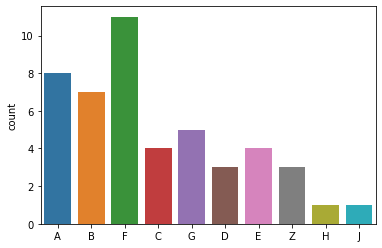

In [4]:
# Plotting out the frequency of tokens in the above list with a seaborn barplot

import seaborn as sns

sns.countplot(tokens);

The most common character in our sequence is  "F". We can't just glance at the the sequence to know which character is the most common. We (humans) struggle to subitize complex data (like random text sequences).

> __Subitize__ is the ability to tell the number of objects in a set, quickly, without counting.  

We need to chunk the data into countable pieces "tokens" for us to analyze them. This inability subitize text data is the motivation for our discussion today.

### Tokenizing with Pure Python

In [5]:
# Unlike us humans(Problem of the Speckled Hen), ML models can quickly detect the number of objects of a similar kind in an instant via subitization.


sample = "Friends, Romans, countrymen, lend me your ears;"
sample

'Friends, Romans, countrymen, lend me your ears;'

##### Iterable Tokens

A string object in Python is already iterable. However, the item you iterate over is a character not a token:

```
from time import sleep
for num, character in enumerate(sample):
    sleep(.5)
    print(f"Char {num} - {character}", end="\r")
```

If we instead care about the words in our sample (our semantic unit), we can use the string method `.split()` to separate the whitespace and create iterable units. :)

In [6]:
from time import sleep
for num, character in enumerate(sample):
    sleep(.5)
    print(f"Char {num} - {character}", end="\r")

In [7]:
# split our text on white spaces
sample.split(" ")
# Almost always a token will be a word, that is, once we've cleaned them. Sometimes tokens can be whitespaces, unicode, puncuation, all sorts of junk. 
# Once we've data cleaned, they're usually just words.

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

Take Away: Strings are broken up into tokens by splitting on the white space between the words in a document.

##### Case Normalization
A common data cleaning data cleaning task with token is to standardize or normalize the case. Normalizing case reduces the chance that you have duplicate records for things which have practically the same semantic meaning. You can use either the `.lower()` or `.upper()` string methods to normalize case.

Consider the following example: 

In [8]:
import pandas as pd
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [9]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [10]:
# We care about reviews.text, this is NLP after all. We're indexing here with .iloc(interger location) to look through the column/feature

df['reviews.text'].iloc[1000]

"These are terrible. Don't last Put then in various items and their life is only 1/2 half of a Duracell"

In [11]:
df["brand"].value_counts()
# considering that we have Amazonbasics with both a lower and upper-case 'b' with different rows/values assigned to them, we'll need to Case Normalize
# in the code cell below 

Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [12]:
# Get the count of how many times each unique brand occurs 

# Always Case Normalize our data to avoid confusion. We do this with .lower() via a lambda function
# YOUR CODE HERE
df["brand"] = df["brand"].apply(lambda txt: txt.lower())
# lambda function iterates the text for each row, normalizing case
df["brand"].value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

##### Keep Only Alphanumeric Characters
Yes, we only want letters and numbers. Everything else is probably noise: punctuation, whitespace, and other notation. This one is little bit more complicated than our previous example. Here we will have to import the base package `re` (regular expressions). 

The only regex expression pattern you need for this is `'[^a-zA-Z 0-9]'` which keeps lower case letters, upper case letters, spaces, and numbers.

In [13]:
sample = sample +" 911"
print(sample)

Friends, Romans, countrymen, lend me your ears; 911


In [14]:
# Split our text on white spaces
sample.split(" ")
# This is DIRTY text. We have commas, semi-colons, a mix of upper-case & lower-case. It's a mess. We can fix these regular expressions. Copy the list down
# below and paste into this 'Text String' box here: https://regex101.com/ 


['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;', '911']

In [16]:
# Make sure to select 'Python' as our 'Flavor.' Refer to the 'Quick Reference' box in the bottom right corner. Regex will capture what I want out my text
# data.

[,;0-9]
# Inputing this at the top of the site, 'Regular Expression', will capture the punctuation & numeric characters in the data I pasted in to the 
# 'Text String' box, allowing us to strip them out of our data.

# Keep everything except the numbers and punctuation


[^,;0-9]
# With the carrot inserted, instead it'll keep everything except the punctuation and numbers. The carrot flips the logic of our regular expression.

# Keeping the numbers and punctuation

In [17]:
import re
regex_remove_non_alpha = '[^a-zA-Z ]'
# Removing everything except all 26 lower & upper case letters. Without the carrot it would remove everything except all the punctuation & numbers
replace_with = ""

clean_text = re.sub(regex_remove_non_alpha, replace_with, sample)

In [18]:
clean_text

'Friends Romans countrymen lend me your ears '

In [19]:
# It's looking better, still not clean yet. At this point we don't need to rely on regex to remove that last bit of whitespace at the end of 'ears' & 
# instate case normalization. Need to split our tokens again after cleaning them. Might as well assign them to a variable as well.
clean_tokens = clean_text.rstrip(" ").lower().split(" ")
clean_tokens
# Our first example of clean tokens

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']

#### Two Minute Challenge 
- Complete the function `tokenize` below
- Combine the methods which we discussed above to clean text before we analyze it
- You can put the methods in any order you want

In [20]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    # Step 1: Use Regex to remove non-alphanumeric chars (i.e. clean text)
    regex_remove_non_alphanumeric = '[^a-zA-Z ]'
    replace_with = ""
    
    clean_text = re.sub(regex_remove_non_alphanumeric, replace_with, text)
    
    # Step 2: Use the rstrip() method to remove any trailing characters (characters at the end a string), space is the default trailing character to remove.
    stripped_text = clean_text.rstrip(" ")
    
    # Step 3: Apply Case Normalization
    clean_text = stripped_text.lower()
    
    # Step 4: Split on white spaces to create tokens (i.e. create tokens)
    tokens = clean_text.split(" ")
    
    # YOUR CODE HERE
    return tokens

In [21]:
# this should be your output
tokenize(sample)

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']

## Follow Along

Our inability to analyze text data becomes quickly amplified in a business context. Consider the following: 

A business which sells widgets also collects customer reviews of those widgets. When the business first started out, they had a human read the reviews to look for patterns. Now, the business sells thousands of widgets a month. The human readers can't keep up with the pace of reviews to synthesize an accurate analysis. They need some science to help them analyze their data.

Now, let's pretend that business is Amazon, and the widgets are Amazon products such as the Alexa, Echo, or other AmazonBasics products. Let's analyze their reviews with some counts. This dataset is available on [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [ ]:
!python -m spacy download en_core_web_lg

In [22]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# load our spacy English Language Model
nlp = spacy.load('en_core_web_lg')
# for spaCy's en_core_web_lg, it actually comes in three sizes, sm for small, md for medium, & lg for large, which is what we are using. It's nearly 1GB
# The Sprint Challenge CodeGrade will be using the small version as it's too memory sensitive. Need to download small version in prep for SC on Friday.

# spaCy has a language model, which uses a word embedding model. a relatively complex neural network that creates word vectors. spaCy is definitely an 
# example of a black box method for sure. 

In [23]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [24]:
# YOUR CODE HERE
# We can get the text data itself by printing out the reviews.text column/feature
df['reviews.text']

0        I order 3 of them and one of the item is bad q...
1        Bulk is always the less expensive way to go fo...
2        Well they are not Duracell but for the price i...
3        Seem to work as well as name brand batteries a...
4        These batteries are very long lasting the pric...
                               ...                        
28327    I got 2 of these for my 8 yr old twins. My 11 ...
28328    I bought this for my niece for a Christmas gif...
28329    Very nice for light internet browsing, keeping...
28330    This Tablet does absolutely everything I want!...
28331    At ninety dollars, the expectionations are low...
Name: reviews.text, Length: 28332, dtype: object

In [25]:
# view count of product review categories
df["primaryCategories"].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [26]:
electronics_mask = df['primaryCategories'] == 'Electronics'
df = df[electronics_mask]

In [27]:
# To simplify our analysis, we're going to isolate the eletronics product reviews
df["primaryCategories"].value_counts()

Electronics    13995
Name: primaryCategories, dtype: int64

## Create Tokens

In [28]:
# We must use the pandas .apply function to use our custom made function on a Pandas Dataframe Column/Series. 
# Assigning our tokenized column to a new column with out dataframe
df['tokens'] = df['reviews.text'].apply(tokenize)

In [29]:
df['tokens']

8343     [great, case, to, keep, everything, in, its, p...
8344     [after, discarding, and, getting, rid, of, bro...
8345     [a, few, dollars, more, but, i, am, boycotting...
8346     [my, initial, impression, of, this, was, very,...
8347     [pros, standard, echo, cons, older, generation...
                               ...                        
28327    [i, got, , of, these, for, my, , yr, old, twin...
28328    [i, bought, this, for, my, niece, for, a, chri...
28329    [very, nice, for, light, internet, browsing, k...
28330    [this, tablet, does, absolutely, everything, i...
28331    [at, ninety, dollars, the, expectionations, ar...
Name: tokens, Length: 13995, dtype: object

#### Analyzing Tokens

In [30]:
# Object from Base Python
from collections import Counter

# YOUR CODE HERE
# Familiarizing ourselves with the Counter() function
word_counter = Counter()
# Counter is a dictionary sub-class. It operates like a dictionary. It has keys and values. It also has additional functionality. 
df["tokens"].apply(lambda token: word_counter.update(token));

# Calling our top 10 most common tokens
word_counter.most_common(10)
# The keys here are our tokens, and the values are the word counts. 'the' appears 17,725 times!

[('the', 17725),
 ('and', 14010),
 ('it', 13116),
 ('to', 12752),
 ('for', 12227),
 ('i', 12039),
 ('a', 10502),
 ('is', 8508),
 ('this', 8113),
 ('my', 7918)]

Let's create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.

In [31]:
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total * 100)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs * 100)

    return wc.sort_values(by='rank')

In [32]:
# Use the Function
wc  = count(df['tokens'])

In [33]:
wc.head()
# Explaining the columns/features

# 'word' is just the word we are looking at
# 'appears_in' number of documents the word appears in
# 'count' is the total word count for the word
# 'rank' measures the overall stats of a token/word against all the others.
# 'pct_total' is the total percentage of each token. So 4% of the tokens in our dataset are compromised of the word 'the'
# 'cul_pct_total' is cummulative percentage total adds the percentage total of the all the tokens that precedes it, with the final cul_pct_total at 100.
# 'appears_in_pct' is the percentage of documents that the word/token appears in. 'the' appears in over half of all documents contained in our dataset.

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
74,the,7811,17725,1.0,4.110831,4.110831,55.812790
20,and,8545,14010,2.0,3.249238,7.360069,61.057521
8,it,7490,13116,3.0,3.041899,10.401969,53.519114
2,to,7137,12752,4.0,2.957479,13.359448,50.996785
43,for,7990,12227,5.0,2.835720,16.195168,57.091819


In [34]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8593,havethen,1,1,8595.0,0.000232,99.999072,0.007145
8595,moztly,1,1,8596.0,0.000232,99.999304,0.007145
8596,itbetter,1,1,8597.0,0.000232,99.999536,0.007145
8597,showsmovies,1,1,8598.0,0.000232,99.999768,0.007145
8598,bookreader,1,1,8599.0,0.000232,100.000000,0.007145


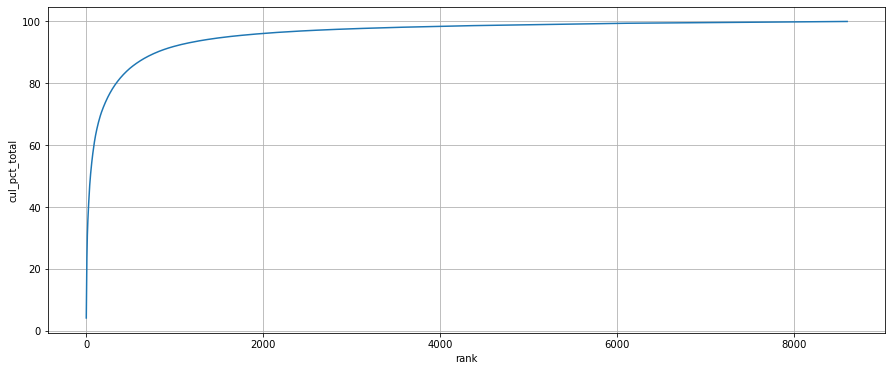

In [35]:
import seaborn as sns

# Cumulative Distribution Plot
plt.figure(figsize=(15,6))
plt.grid()
sns.lineplot(x='rank', y='cul_pct_total', data=wc);
# Didn't take very long for every token in our dataset to appear in these Amazon product reviews

In [36]:
# Let's look at just the first 100 tokens.
# Comprises the first 62% of all tokens used
wc[wc['rank'] <= 100]['cul_pct_total'].max()

62.24923349521544

In [38]:
# What if we bump this up to 350?
# We find that just the first 350 tokens take up the vast majority of our dataset
wc[wc['rank'] <= 350]['cul_pct_total'].max()

80.45122895880584

In [39]:
# If we bump this up to 2000, we get 96%. So only a 16% increase for 5.7 times as many tokens. This explains the curve in our plot above.
# With this type of analysis we won't even need the other ~6000 tokens or so. They would only comprise the last 4 percent.
wc[wc['rank'] <= 2000]['cul_pct_total'].max()

# This relates to the Pareto principle, or 80/20 rule. Where 80% of consequencies originate from 20% of the causes. Or in data science terms, 80% of our
# output is determined by 20% of our input.

96.12712151362072

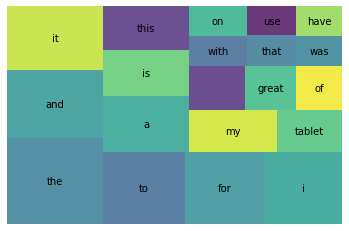

In [42]:
import squarify
import matplotlib.pyplot as plt

# Top 20 words. So we're using the rank column via boolean masking
wc_top20 = wc[wc['rank'] <= 20]

# Plotting each word by total percentage
# I can increase the size of this squarify plot with this line of code: 
#plt.figure(figsize=(10,10))

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# This is an example of a word cloud. May want to use one of these in a presentation of my work to non data scientists or to blogpost readers

### Processing Raw Text with Spacy

Spacy's datamodel for documents is unique among NLP libraries. Instead of storing the documents components in various data structures, Spacy indexes components and simply stores the lookup information. 

This is often why Spacy is considered to be more production grade than library like NLTK.

In [43]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [44]:
sample = """
Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Nat­ur­al Lan­guage Pro­cessing is a field that cov­ers com­puter un­der­stand­ing and ma­nip­u­la­tion of hu­man lan­guage, and it’s ripe with pos­sib­il­it­ies for news­gath­er­ing,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu­ally hear about it in the con­text of ana­lyz­ing large pools of legis­la­tion or other doc­u­ment sets, at­tempt­ing to dis­cov­er pat­terns or root out cor­rup­tion.”
"""

In [45]:
sample
# This is ugly, it's messy. Even has some ASCII! However, if we pass this in to our NLP model, it outputs...

'\nNatural Language Processing Summary\nThe field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).\n\n“Nat\xadur\xadal Lan\xadguage Pro\xadcessing is a field that cov\xaders com\xadputer un\xadder\xadstand\xading and ma\xadnip\xadu\xadla\xadtion of hu\xadman lan\xadguage, and it’s ripe with pos\xadsib\xadil\xadit\xadies for news\xadgath\xader\xading,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu\xadally hear about it in the con\xadtext of ana\xadlyz\xading large pools of legis\xadla\xadtion or other doc\xadu\xadment sets, at\xadtempt\xading to dis\xadcov\xader pat\xadterns or root out cor\xadrup\xadtion.”\n'

In [46]:
doc = nlp(sample)

In [47]:
# We can pass our sample into a vector..
doc.vector

array([-6.19803108e-02,  1.21397689e-01, -6.41047880e-02, -3.77149247e-02,
        9.79546681e-02,  1.03489175e-01,  6.68717595e-03, -4.09535430e-02,
       -2.53287312e-02,  1.60352492e+00, -1.60002813e-01,  5.87123446e-02,
        5.76161928e-02, -5.02043888e-02, -7.11362660e-02, -2.24289158e-03,
       -1.85152609e-02,  1.04867136e+00, -1.76057890e-01, -1.34194896e-01,
       -1.78186167e-02,  3.54470052e-02, -9.24611315e-02,  1.63706746e-02,
        8.62975419e-02, -2.41379086e-02,  2.70974804e-02,  5.37514910e-02,
        2.72294115e-02, -5.50297610e-02, -2.61503477e-02,  4.11509089e-02,
        5.22623584e-02,  9.01425537e-03,  1.10771023e-01, -5.84792010e-02,
        2.73172781e-02,  5.39207719e-02, -4.83783633e-02, -2.00768206e-02,
        6.73848689e-02,  7.79752294e-03, -3.74064259e-02, -3.62696722e-02,
        4.19854149e-02,  3.60319093e-02, -1.07984051e-01, -1.63280107e-02,
        1.05942842e-02, -6.79382822e-03,  1.78119559e-02,  4.21615317e-02,
       -3.81596535e-02,  

In [48]:
# We can even check sentiment. And it currently thinks it's 0, lol

doc.sentiment

0.0

In [51]:
# create a tokenizer using spacy

# YOUR CODE HERE
# Checking the documentation, we have to fit our nlp pipeline with iterable text.
# Next we'll put it in a for loop

#nested list that stores all tokens from all docs
tokens = []          # This line completes our eternal for loop.
for doc in nlp.pipe(df["reviews.text"]):
    
    # Creating a list for our for loop. Stores tokens from individual documents
    doc_tokens = []
    
    # Second For Loop. This is made so when the document exits from the NLP pipeline, it'll have all the functionality we glimpsed from up in our doc=nlp(sample) up above
    # iterates through the tokens of the doc
    for token in doc:
        # Appending our tokens. Using .text to avoid any nested list that may be in there. Stores doc's tokens in list
        doc_tokens.append(token.text)
        
    # Stores doc_tokens in our master list    
    tokens.append(doc_tokens)

In [52]:
# Overriding this feature called tokens. Doesn't matter this far into the notebook.
# Saving the results of our eternal for loop to this feature/column
df['tokens'] = tokens

In [53]:
# Passing our overrided feature into our calc function to get statistics on our tokens.
wc = count(df["tokens"])

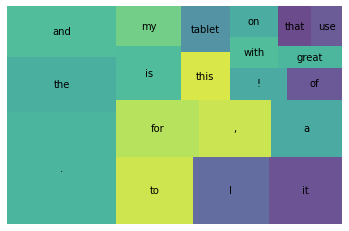

In [55]:
# Now we plot another wordcloud/squarify to see if anything has changed

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Before, our tokens were clean. Now our tokens are riddled with punctuation after using that spaCy NLP model!
# Not looking great.

# Now we're going to iterate with spaCy where we make higher quality tokens. Our problem is that we didn't perform any quality checks on our tokens when
# we created the eternal for loop. 

## Challenge

In the module project, you will apply tokenization to another set of review data and produce visualizations of those tokens. 

# Stop Words (Learn)
<a id="p2"></a>

## Overview
Section Agenda
- What are they?
- How do we get rid of them using Spacy?
- Visualization
- Libraries of Stop Words
- Extending Stop Words
- Statistical trimming

If the visualizations above, you began to notice a pattern. Most of the words don't really add much to our understanding of product reviews. Words such as "I", "and", "of", etc. have almost no semantic meaning to us. We call these useless words "stop words," because we should 'stop' ourselves from including them in the analysis. 

Most NLP libraries have built in lists of stop words that common english words: conjunctions, articles, adverbs, pronouns, and common verbs. The best practice, however, is to extend/customize these standard english stopwords for your problem's domain. If I am studying political science, I may want to exclude the word "politics" from my analysis; it's so common it does not add to my understanding. 

## Follow Along 

### Default Stop Words
Let's take a look at the standard stop words that came with our Spacy model:

In [56]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [57]:
# Use spacy to create a tokenizer that removes stop words

# YOUR CODE HERE
tokens = []          # This line completes our eternal for loop.
for doc in nlp.pipe(df["reviews.text"]):
    
    # Creating a list for our for loop. Stores tokens from individual documents
    doc_tokens = []
    
    # Second For Loop. This is made so when the document exits from the NLP pipeline, it'll have all the functionality we glimpsed from up in our doc=nlp(sample) up above
    # iterates through the tokens of the doc
    for token in doc:
        # Provides stopword and punctuation filters for our tokens
        if (token.is_stop== False) & (token.is_punct == False):
            # Appending our tokens. Using .text to avoid any nested list that may be in there. Stores doc's tokens in list
            # case normalize our tokens
            doc_tokens.append(token.text.lower())
    # Stores doc_tokens in our master list    
    tokens.append(doc_tokens)

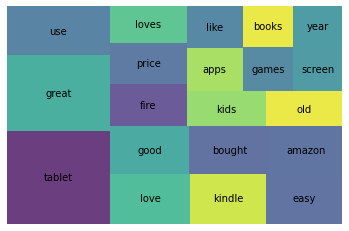

In [58]:
df['tokens'] = tokens

wc = count(df["tokens"])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Better! So much better! No punctuation!
# However, is 'Amazon' really useful? Now we can extend out stop words to get rid of it!

### Extending Stop Words

In [59]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [76]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries', 'amazon', 'Amazon', 'I', 'i'])

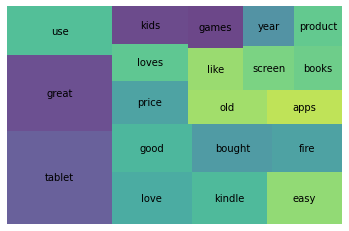

In [62]:
# use spacy to create a tokenizer that removes stopwords using STOP_WORDS

# YOUR CODE HERE
tokens = []

for doc in nlp.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Statistical Trimming

So far, we have talked about stop word in relation to either broad english words or domain specific stop words. Another common approach to stop word removal is via statistical trimming. The basic idea: preserve the words that give the most about of variation in your data. 

Do you remember this graph?

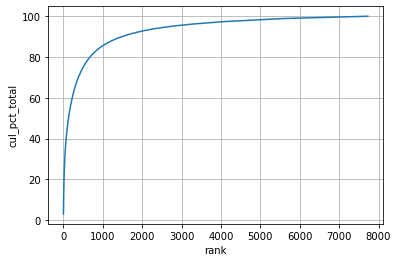

In [63]:
plt.grid()
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

This graph tells us that only a *handful* of words represented 80% of words in the overall corpus. We can interpret this in two ways: 
1. The words that appear most frequently may not provide any insight into the mean on the documents since they are so prevalent. 
2. Words that appear infrequency (at the end of the graph) also probably do not add much value, because the are mentioned so rarely. 

Let's take a look at the words at the bottom and the top and make a decision for ourselves:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


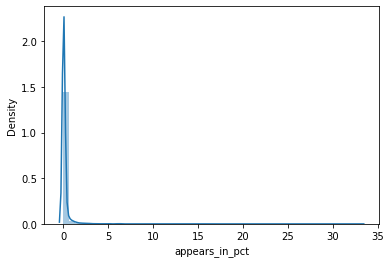

In [64]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

# The idea behind Statistical Trimming is that words that appear TOO frequently and words that appear INFREQUENTLY(e.g. typos) are both chopped off
# from both ends as they don't give provide enough meaning to warrant them unbalancing the dataset

In [67]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7226,45,4,4,3199.0,0.002085,96.046782,0.028582
7236,5yr,4,4,3200.0,0.002085,96.048867,0.028582
7239,sesame,4,4,3201.0,0.002085,96.050951,0.028582
7237,street,4,4,3202.0,0.002085,96.053036,0.028582
7280,utube,4,4,3203.0,0.002085,96.055121,0.028582


In [66]:
wc.describe()

,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
count,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,53.750873,58.400825,1585.990797,0.030438,85.103915,0.384072
std,190.756004,220.521232,922.771085,0.114933,14.197304,1.363030
min,4.000000,4.000000,1.000000,0.002085,3.072930,0.028582
25%,6.000000,6.000000,788.500000,0.003127,82.336646,0.042872
50%,11.000000,12.000000,1577.000000,0.006254,90.606612,0.078599
75%,34.000000,35.000000,2376.500000,0.018242,94.080336,0.242944
max,4617.000000,5896.000000,3203.000000,3.072930,96.055121,32.990354


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


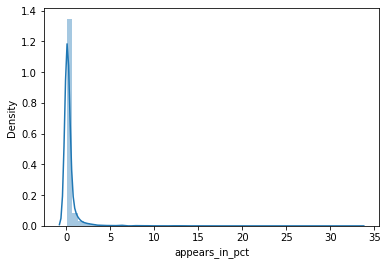

In [65]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

## Challenge

In the module project, you will apply stop word removal to a new corpus. You will focus on applying dictionary based stop word removal, but as a stretch goal, you should consider applying statistical stopword trimming. 

# Stemming & Lemmatization (Learn)
<a id="p3"></a>

## Overview

You can see from our example above there is still some normalization to do to get a clean analysis. You notice that there many words (*i.e.* 'batteries', 'battery') which share the same root word. We can use either the process of stemming or lemmatization to trim our words down to the 'root' word. 

__Section Agenda__:

- Which is which
- why use one v. other
- show side by side visualizations 
- how to do it in spacy & nltk
- introduce PoS in here as well

## Follow Along

### Stemming

> *a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.* - [Martin Porter](https://tartarus.org/martin/PorterStemmer/)

Some examples include:
- 'ing'
- 'ed'
- 's'

These rules are by no means comprehensive, but they are somewhere to start. Most stemming is done by well documented algorithms such as Porter, Snowball, and Dawson. Porter and its newer version Snowball are the most popular stemming algorithms today. For more information on various stemming algorithms check out [*"A Comparative Study of Stemming Algorithms"*](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf) 


Spacy does not do stemming out of the box, but instead uses a different technique called *lemmatization* which we will discuss in the next section. Let's turn to an antique python package `nltk` for stemming. 

In [70]:
# We're feature engineering every time we create tokens. And every single time you generate a token, you're creating a feature, thus feature engineering.

from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["is", "was", "be", "are", "wolf", "wolves", "swim", "swimmer"]

for word in words:
    print(ps.stem(word))

is
wa
be
are
wolf
wolv
swim
swimmer


### Two Minute Challenge

Apply the Porter stemming algorithm to the tokens in the `df` dataframe. Visualize the results in the tree graph we have been using for this session.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Lemmatization

You notice immediately that results are kinda funky - words just oddly chopped off. The Porter algorithm did exactly what it knows to do: chop off endings. Stemming works well in applications where humans don't have to worry about reading the results. Search engines and more broadly information retrieval algorithms use stemming. Why? Because it's fast. 

Lemmatization on the other hand is more methodical. The goal is to transform a word into its base form called a lemma. Plural nouns with funky spellings get transformed to singular tense. Verbs are all transformed to the transitive. Nice tidy data for a visualization. :) However, this tidy data can come at computational cost. Spacy does a pretty freaking good job of it though. Let's take a look:

In [71]:
sent = "men man women woman wolf wolves run runs running"
doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

men    man
man    man
women    woman
woman    woman
wolf    wolf
wolves    wolf
run    run
runs    run
running    run


In [77]:
# Wrap it all in a function
# Here's a function that gets lemmas for us
def get_lemmas(text):
    '''
    Takes a single document as input.
    Returns a list of lemmas (a form of tokens) for that document
    '''

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        # Filter out stop words, puncuation, and pronouns. pos_ means part of speech in spaCy's documentation.
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            # case normalize the lemmas
            lemmas.append(token.lemma_)
    
    return lemmas

In [78]:
df['lemmas'] = df['reviews.text'].apply(get_lemmas)  # Might take a few minutes!

In [79]:
cols = ['lemmas', 'reviews.text']
df[cols].head()

,lemmas,reviews.text
8343,"[great, case, place, husband, love, hold, lot,...",Great case to keep everything in its place! My...
8344,"[discard, getting, rid, broken, cd, case, brok...",After discarding and getting rid of broken cd ...
8345,"[dollar, boycott, amazon]","A few dollars more, but I am boycotting amazon"
8346,"[initial, impression, good, material, nice, sh...",My initial impression of this was very good. T...
8347,"[pro, Standard, Echo, con, old, generation, Ec...",Pros: Standard Echo. Cons: Older generation Ec...


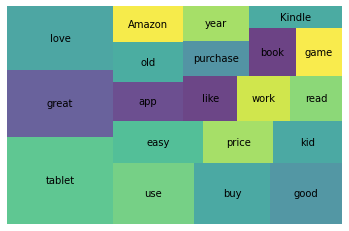

In [80]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Here we can see words from earlier squarify plots have collapsed into lemmas!

## Challenge

You should know how to apply lemmatization with Spacy to a corpus of text. 

# Review

In this module project, you've seen us apply Natural Language Processing techniques (tokenization, stopword removal, and lemmatization) to a corpus of Amazon text reviews. We analyzed those reviews using these techniques and discovered that Amazon customers are generally satisfied with the battery life of Amazon products and generally appear satisfied. 

You will apply similar techniques to today's [module project assignment](LS_DS_411_Text_Data_Assignment.ipynb) to analyze coffee shop reviews from yelp. Remember that the techniques of processing the text are just the beginning. There are many ways to slice and dice the data. 

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf

## Advanced Resources & Techniques
- Named Entity Recognition (NER)
- Dependcy Trees 
- Generators
- the major libraries (NLTK, Spacy, Gensim)